# Chest X-ray Pneumonia classification
 

In [3]:
#run this if drive not mounted USE teamenel645@gmail.com account
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


## 1) Downloading Kaggle data to drive

In [ ]:
#DONT RUN AGAIN
# ! pip install -q kaggle
# from google.colab import files
# files.upload()


In [ ]:
# ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
#Changing permision to use my token to access kaggle
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! mkdir MyDrive/MyDrive/ENEL-645/data

In [ ]:
# ! kaggle datasets list
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
# ! unzip chest-xray-pneumonia.zip -d MyDrive/MyDrive/ENEL-645/data

## 2) Loading data into numpy array from drive

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import glob
import matplotlib.pyplot as plt
from skimage import transform


In [ ]:
#Loading test data
#DONT Run unless you want to re size
# data_dir_test='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/test/'
# images_test = np.asarray(glob.glob(data_dir_test + "/*/*.jpeg",recursive=True))
# labels_test = np.asarray([f.split("/")[-2] for f in images_test])



In [ ]:
#Loading train data
# #DONT Run unless you want to re size
# data_dir_train='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/train/'
# images_train = np.asarray(glob.glob(data_dir_train + "/*/*.jpeg",recursive=True))
# labels_train = np.asarray([f.split("/")[-2] for f in images_train])

In [ ]:
#Loading val data
#DONT Run unless you want to re size
# data_dir_val='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/val/'
# images_val = np.asarray(glob.glob(data_dir_val + "/*/*.jpeg",recursive=True))
# labels_val = np.asarray([f.split("/")[-2] for f in images_val])

In [ ]:
#Shuffling data
#DONT Run unless you want to re size
# from sklearn.utils import shuffle
# X_test,y_test = shuffle(images_test, labels_test, random_state=0)
# X_train,y_train = shuffle(images_train, labels_train, random_state=0)
# X_val,y_val = shuffle(images_val, labels_val, random_state=0)

In [ ]:
# plt.figure(figsize = (20,20))
# for i in range(30):
#   plt.subplot(5,6,i+1) 
#   n=plt.imread(X_test[i])
#   plt.imshow(n,cmap="gray")
#   plt.title(y_test[i])
# plt.show

## 3) Pre-Processing


### 3.1) Resizing 

In [ ]:
# Resizing 
#DONT RUN UNLESS YOU WANT TO RE-SIZE
# from skimage import transform
# from skimage import io
# img_height = 180
# img_width = 180
# #test data
# X_resized_test = np.zeros((len(X_test),img_height,img_width,1))
# for (ii,img) in enumerate(X_test):
#     X_resized_test[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))
# #train data
# X_resized_train = np.zeros((len(X_train),img_height,img_width,1))
# for (ii,img) in enumerate(X_train):
#     X_resized_train[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))
# #val data
# X_resized_val = np.zeros((len(X_val),img_height,img_width,1))
# for (ii,img) in enumerate(X_val):
#     X_resized_val[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))

In [ ]:
#Saving np arrays so we dont have to re-run the sizing again
#DONT RUN UNLESS YOU CHANGED THE SIZING
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/test',X_resized_test)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/test_label',y_test)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/train',X_resized_train)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/train_label',y_train)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/val',X_resized_val)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/val_label',y_val)

In [5]:
#Loading np arrays
Xtest=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/test.npy')
ytest=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/test_label.npy')
Xtrain_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/train.npy')
ytrain_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/train_label.npy')
Xval_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/val.npy')
yval_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/val_label.npy')

In [6]:
#Resplitting the train-val data to hav 70/30 ratio
Xtrain_val=np.vstack((Xtrain_actual,Xval_actual))
Ytrain_val=np.concatenate((ytrain_actual,yval_actual))
Xtrain_val.shape

(5232, 180, 180, 1)

In [7]:
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain_val,Ytrain_val,test_size=0.3,shuffle=True,stratify=Ytrain_val)

In [8]:
unique, counts = np.unique(Ytrain_val, return_counts=True)
print(unique ,counts)

['NORMAL' 'PNEUMONIA'] [1349 3883]


In [9]:
unique, counts = np.unique(ytrain, return_counts=True)
print(unique ,counts)

['NORMAL' 'PNEUMONIA'] [ 944 2718]


In [10]:
unique, counts = np.unique(yval, return_counts=True)
print(unique ,counts)

['NORMAL' 'PNEUMONIA'] [ 405 1165]


<function matplotlib.pyplot.show>

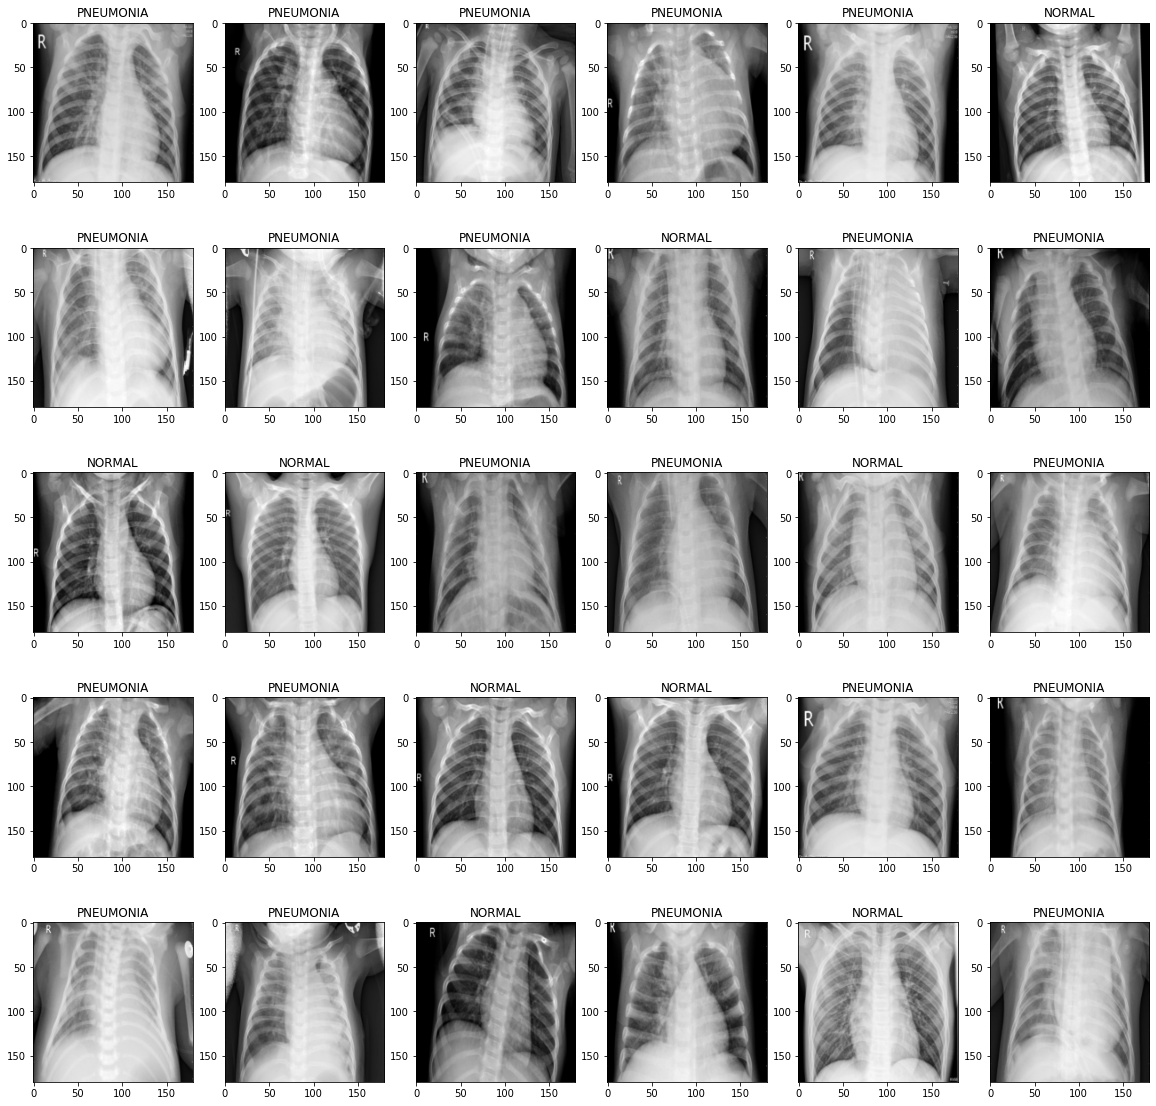

In [9]:
#Sample of resized data
##Imshow can either do 2d or RGM numpy arrays so i had to reshape inorder to display
b=Xtest.reshape(624,180,180)
plt.figure(figsize = (20,20))
for i in range(30):
  plt.subplot(5,6,i+1) 
  plt.imshow(b[i],cmap="gray")
  plt.title(ytest[i])
plt.show

### 3.2) Data scaling

In [11]:
# The data seems to be already scale dbetween 0 and 1, so we do nothing
print(Xtrain.min(),Xtrain.max(),Xtrain.mean(),Xtrain.std())
print(Xval.min(),Xval.max(),Xval.mean(),Xval.std())

0.0 1.0 0.47946559735028577 0.23523102338080445
0.0 1.0 0.47728512579362486 0.23599714933376972


### 3.3) One Hot Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
##Converting labels to numbers
le=LabelEncoder()
le.fit(ytrain)
classes_names=[]
print("Label Encoding:\n1 is for label: ",le.inverse_transform([1]),"\n0 is for label: ",le.inverse_transform([0]))
ytrain_le=le.transform(ytrain)
ytest_le=le.transform(ytest)
yval_le=le.transform(yval)
##One hot encoding
Y_train_oh = to_categorical(ytrain_le)
Y_val_oh = to_categorical(yval_le)
Y_test_oh = to_categorical(ytest_le)
Y_test_oh[5]


Label Encoding:
1 is for label:  ['PNEUMONIA'] 
0 is for label:  ['NORMAL']


array([1., 0.], dtype=float32)

### 3.4) Data Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
batch_size = 32
gen_params = {"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
               "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
               "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
                "cval": 0}
train_gen = ImageDataGenerator(**gen_params)
val_gen = ImageDataGenerator(**gen_params)
# X_train_expanded=np.expand_dims(Xtrain,axis=3)
train_gen.fit(Xtrain,seed = 1)
val_gen.fit(Xval, seed = 1)

train_flow = train_gen.flow(Xtrain,Y_train_oh,batch_size = batch_size)
val_flow = val_gen.flow(Xval,Y_val_oh,batch_size = batch_size) 


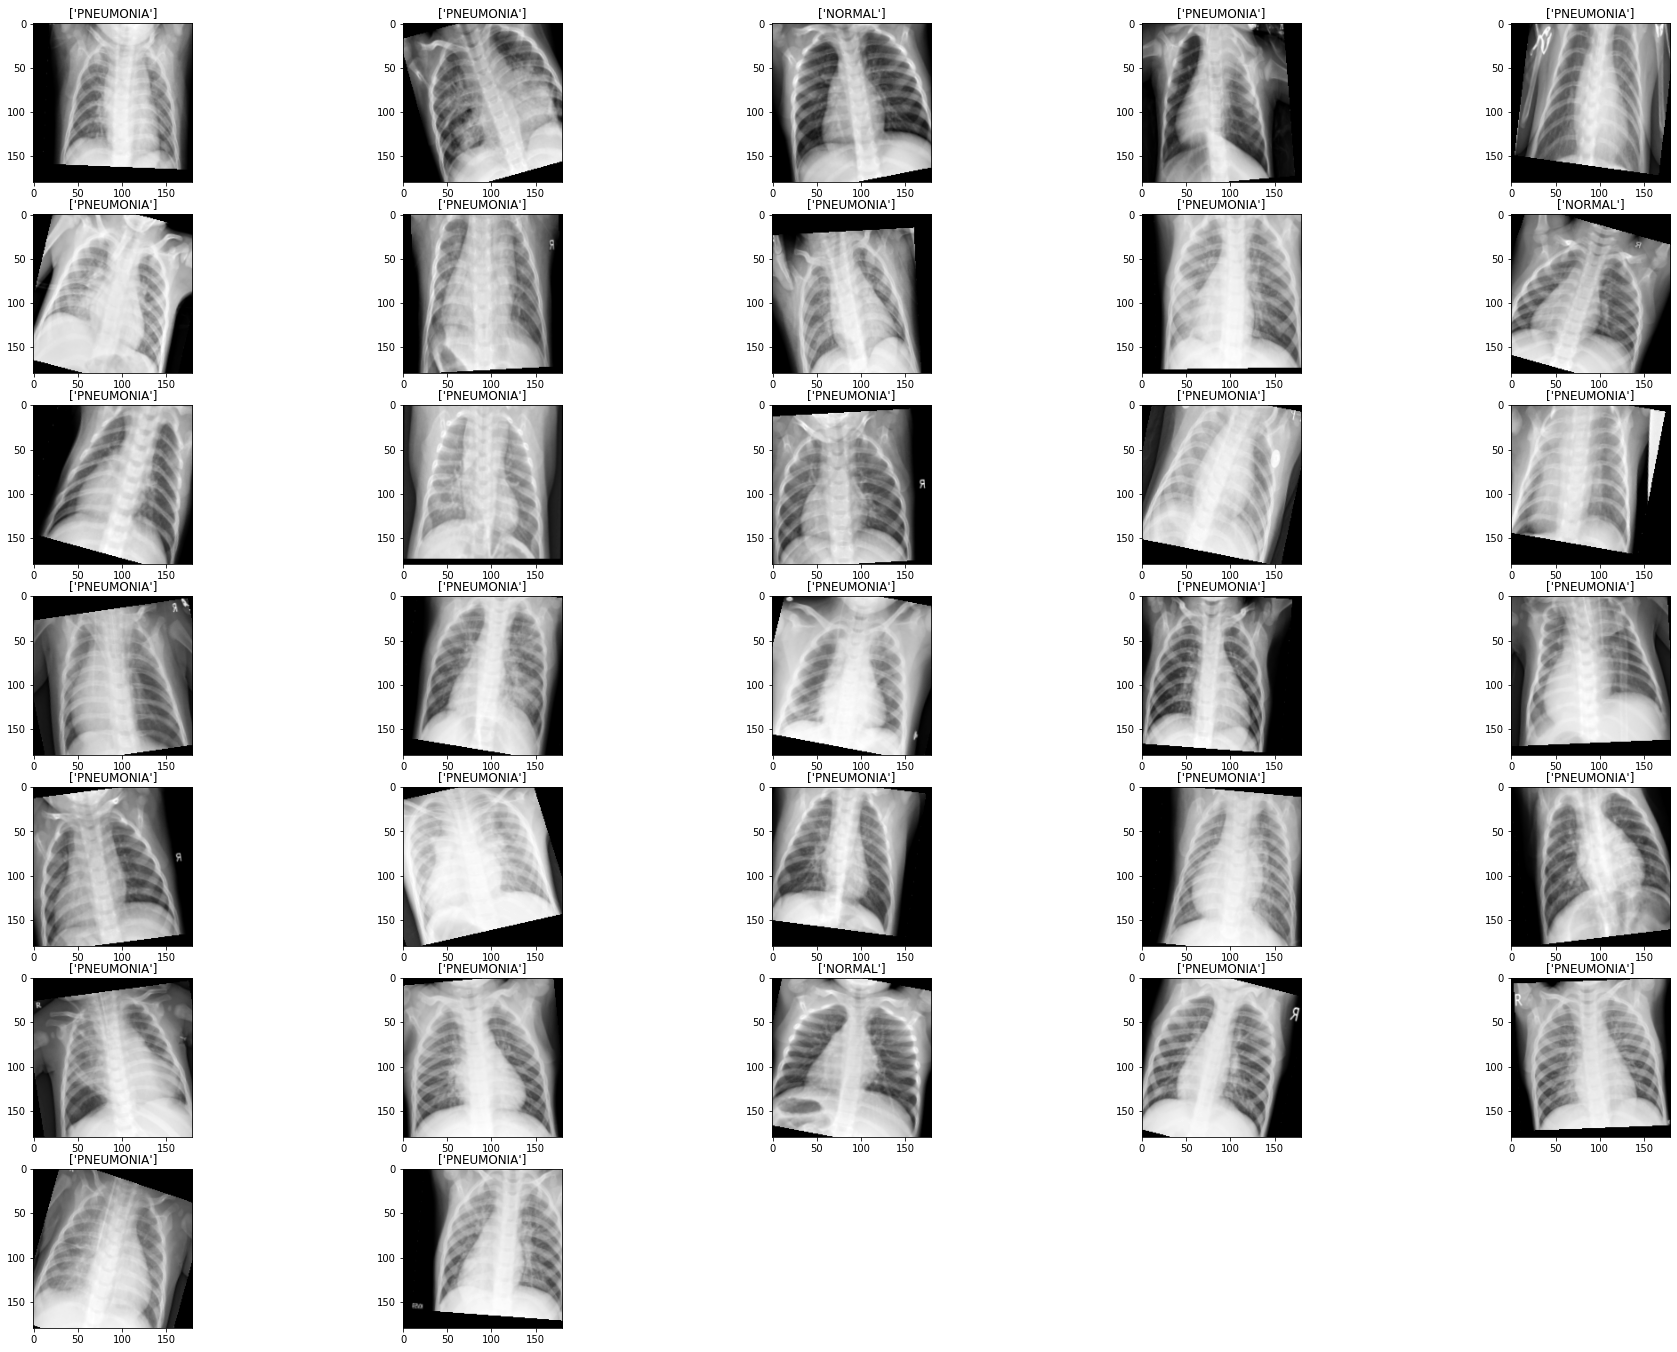

In [13]:
#Displaying sample of Augmented data
Xbatch,Ybatch = train_flow.__getitem__(0)
plt.figure(figsize = (32,24))
for ii in range(batch_size):
    plt.subplot(7,5,ii+1)
    temp=Xbatch[ii].reshape(180,180)#dropping the channel axis
    plt.imshow(temp, cmap = "gray")
    plt.title(le.inverse_transform([int(Ybatch[ii].argmax())]))#using inverse of the label encoder to find the label
plt.show()

## 4) Defining Callbacks


In [14]:
resnet_best_model = "MyDrive/MyDrive/ENEL-645/models/team_8_Resnet.h5"

# define your callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)
monitor = tf.keras.callbacks.ModelCheckpoint(resnet_best_model, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# learning rate scheduler
def scheduler(epoch, lr):
    if epoch%10 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

## 5) Models

### 5.2) Sarims model def

#### 5.2.1) Def 

In [15]:
def my_model (ishape = (180, 180, 1), k=2, lr= 0.0001):
  model_input = tf.keras.layers.Input(shape=ishape)
  l1 = tf.keras.layers.Conv2D(64, (7,7), padding = 'same', strides=(2,2), activation='relu')(model_input)
  l2 = tf.keras.layers.MaxPool2D((3,3), strides=(2,2))(l1)

  l3 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(l2)
  l4 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(l3)
  l5 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(l4)
  l6 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(l5)

  l7 = tf.keras.layers.Conv2D(128, (3,3), strides=(2,2), padding='same', activation='relu')(l6)
  l8 = tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu')(l7)
  l9 = tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu')(l8)
  l10 = tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu')(l9)

  l11 = tf.keras.layers.Conv2D(256, (3,3), strides=(2,2), padding='same', activation='relu')(l10)
  l12 = tf.keras.layers.Conv2D(256, (3,3),padding='same', activation='relu')(l11)
  l13 = tf.keras.layers.Conv2D(256, (3,3),padding='same', activation='relu')(l12)
  l14 = tf.keras.layers.Conv2D(256, (3,3),padding='same', activation='relu')(l13)

  l15 = tf.keras.layers.Conv2D(512, (3,3), strides=(2,2), padding='same', activation='relu')(l14)
  l16 = tf.keras.layers.Conv2D(512, (3,3),padding='same', activation='relu')(l15)
  l17 = tf.keras.layers.Conv2D(512, (3,3),padding='same', activation='relu')(l16)
  l18 = tf.keras.layers.Conv2D(512, (3,3),padding='same', activation='relu')(l17)

  l19 = tf.keras.layers.AvgPool2D((6,6))(l18)
  flat = tf.keras.layers.Flatten()(l19)
  out = tf.keras.layers.Dense(k, activation='softmax')(flat)
  model = tf.keras.models.Model(inputs = model_input, outputs = out)
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [16]:
model = my_model()
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 90, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928 

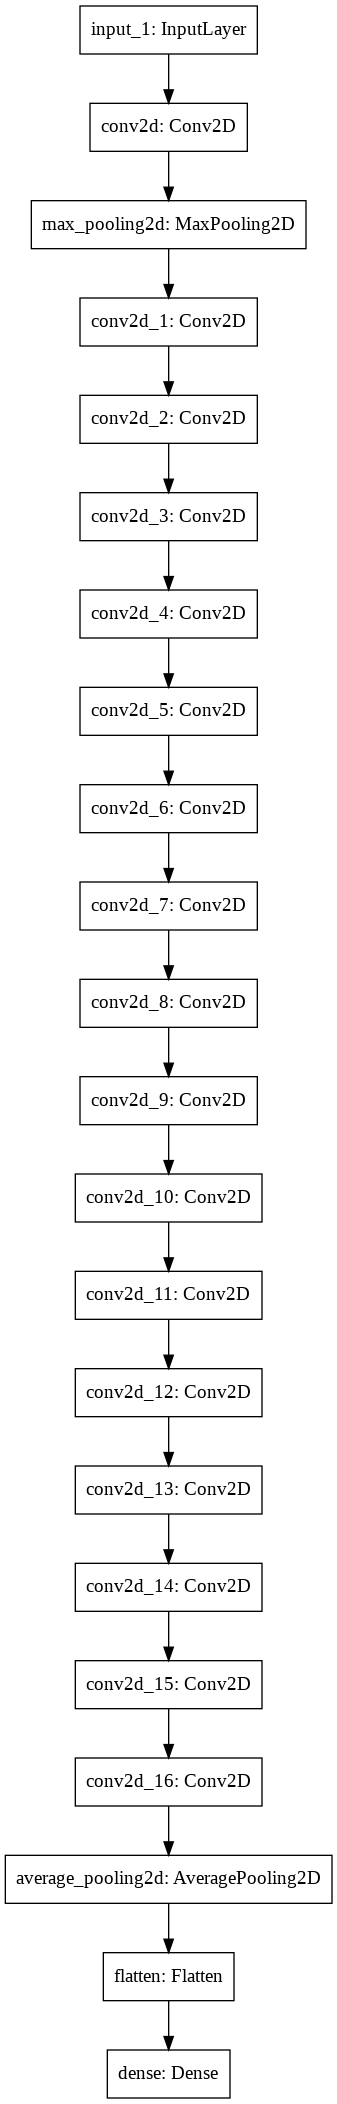

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

#### 5.2.2) Train 

In [19]:
model.fit(train_flow, epochs = 100, verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=(val_flow))

Epoch 1/100
115/115 [==============================] - 15s 122ms/step - loss: 0.1414 - accuracy: 0.9489 - val_loss: 0.1883 - val_accuracy: 0.9146
Epoch 2/100
115/115 [==============================] - 13s 114ms/step - loss: 0.1095 - accuracy: 0.9585 - val_loss: 0.0882 - val_accuracy: 0.9739
Epoch 3/100
115/115 [==============================] - 13s 114ms/step - loss: 0.1142 - accuracy: 0.9566 - val_loss: 0.1276 - val_accuracy: 0.9497
Epoch 4/100
115/115 [==============================] - 13s 113ms/step - loss: 0.1073 - accuracy: 0.9588 - val_loss: 0.0964 - val_accuracy: 0.9650
Epoch 5/100
115/115 [==============================] - 13s 113ms/step - loss: 0.1346 - accuracy: 0.9506 - val_loss: 0.1344 - val_accuracy: 0.9459
Epoch 6/100
115/115 [==============================] - 13s 113ms/step - loss: 0.1109 - accuracy: 0.9579 - val_loss: 0.1095 - val_accuracy: 0.9554
Epoch 7/100
115/115 [==============================] - 13s 112ms/step - loss: 0.0984 - accuracy: 0.9629 - val_loss: 0.0946 -

#### 5.2.3) Evaluate 

In [20]:
# NOTE: At the time of the midterm, the best achieved accuracy was found to be 
# 90.54%. The accuracy below was achieved at the time of the final report 
# submission, when the notebook was reran to show our results for final submission.
# For the sake of the final, please consider findings published in the report 
# over the accuracy stated below.
model.load_weights(resnet_best_model)
metrics = model.evaluate(Xtest,Y_test_oh)

20/20 [==============================] - 0s 23ms/step - loss: 0.2512 - accuracy: 0.9263
